In [ ]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
import sys
import os

# Add the scripts folder to the Python path
scripts_path = os.path.abspath('../scripts')
print(f"Scripts path: {scripts_path}")
sys.path.append(scripts_path)

# Now import the required functions
try:
    from data_extraction import load_data_from_postgres, load_data_using_sqlalchemy
    from sql_queries import execute_telecom_queries
    print("Imports successful")
except ImportError as e:
    print(f"Error importing modules: {e}")

Scripts path: /home/dura/Codes/week2/scripts
Imports successful


In [9]:
# SQL query
query = "SELECT * FROM xdr_data;"  

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

/home/dura/Codes/week2/scripts/data_extraction.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [10]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [12]:

if 'MSISDN/Number' in df.columns:
    # Aggregate engagement metrics per customer
    engagement_metrics = df.groupby('MSISDN/Number').agg({
        'Bearer Id': 'count',  # Session frequency
        'Dur. (ms)': 'sum',    # Total session duration
        'Total DL (Bytes)': 'sum',  # Total download traffic
        'Total UL (Bytes)': 'sum'   # Total upload traffic
    }).reset_index()

    # Rename columns for clarity
    engagement_metrics.rename(columns={
        'Bearer Id': 'session_frequency',
        'Dur. (ms)': 'total_duration',
        'Total DL (Bytes)': 'total_download',
        'Total UL (Bytes)': 'total_upload'
    }, inplace=True)

    # Calculate total traffic
    engagement_metrics['total_traffic'] = engagement_metrics['total_download'] + engagement_metrics['total_upload']

    print("Aggregated engagement metrics:")
    print(engagement_metrics.head())
else:
    print("Column 'MSISDN/Number' does not exist in the dataframe.")

Aggregated engagement metrics:
   MSISDN/Number  session_frequency  total_duration  total_download  \
0   3.360100e+10                  1        116720.0    8.426375e+08   
1   3.360100e+10                  1        181230.0    1.207552e+08   
2   3.360100e+10                  1        134969.0    5.566597e+08   
3   3.360101e+10                  1         49878.0    4.019932e+08   
4   3.360101e+10                  2         37104.0    1.363130e+09   

   total_upload  total_traffic  
0    36053108.0   8.786906e+08  
1    36104459.0   1.568596e+08  
2    39306820.0   5.959665e+08  
3    20327526.0   4.223207e+08  
4    94280527.0   1.457411e+09  


In [13]:
# Top 10 customers per engagement metric
top_10_session_frequency = engagement_metrics.nlargest(10, 'session_frequency')
top_10_total_duration = engagement_metrics.nlargest(10, 'total_duration')
top_10_total_traffic = engagement_metrics.nlargest(10, 'total_traffic')

print("Top 10 customers by session frequency:")
print(top_10_session_frequency)

print("Top 10 customers by total duration:")
print(top_10_total_duration)

print("Top 10 customers by total traffic:")
print(top_10_total_traffic)

Top 10 customers by session frequency:
       MSISDN/Number  session_frequency  total_duration  total_download  \
13526   3.362632e+10                 18       8791927.0    7.301517e+09   
6437    3.361489e+10                 17       9966898.0    8.156743e+09   
13180   3.362578e+10                 17      18553754.0    7.770043e+09   
37052   3.365973e+10                 16       4035428.0    7.081602e+09   
76363   3.367588e+10                 15       4865947.0    7.309542e+09   
92923   3.376054e+10                 15       9279434.0    7.811295e+09   
65118   3.366716e+10                 13       8744914.0    5.052068e+09   
666     3.360313e+10                 12       6287761.0    4.540607e+09   
1279    3.360452e+10                 12       5207990.0    5.096079e+09   
13994   3.362708e+10                 12       4703516.0    5.309479e+09   

       total_upload  total_traffic  
13526   669650721.0   7.971167e+09  
6437    689483001.0   8.846226e+09  
13180   729577380.0   8.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the engagement metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['session_frequency', 'total_duration', 'total_traffic']])

# Run K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['cluster'] = kmeans.fit_predict(normalized_metrics)

print("Cluster assignments:")
print(engagement_metrics['cluster'].value_counts())

Cluster assignments:
cluster
0    79811
1    23461
2     3584
Name: count, dtype: int64


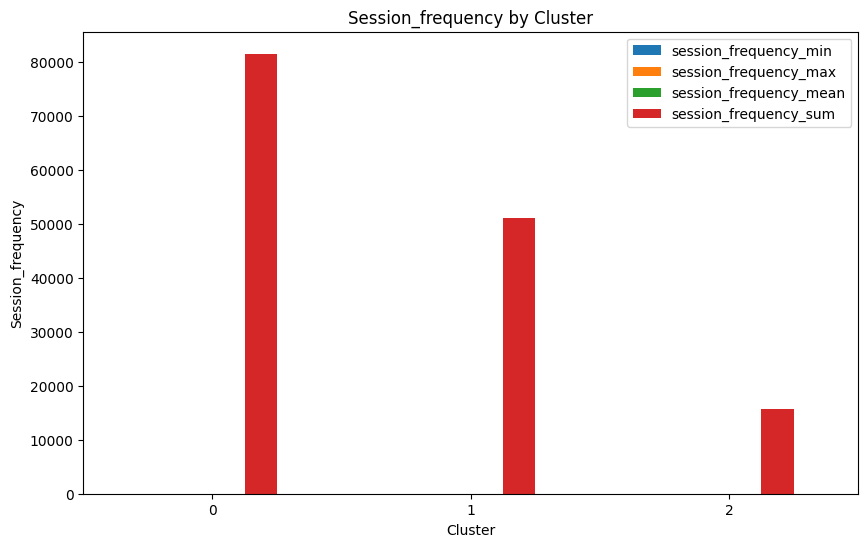

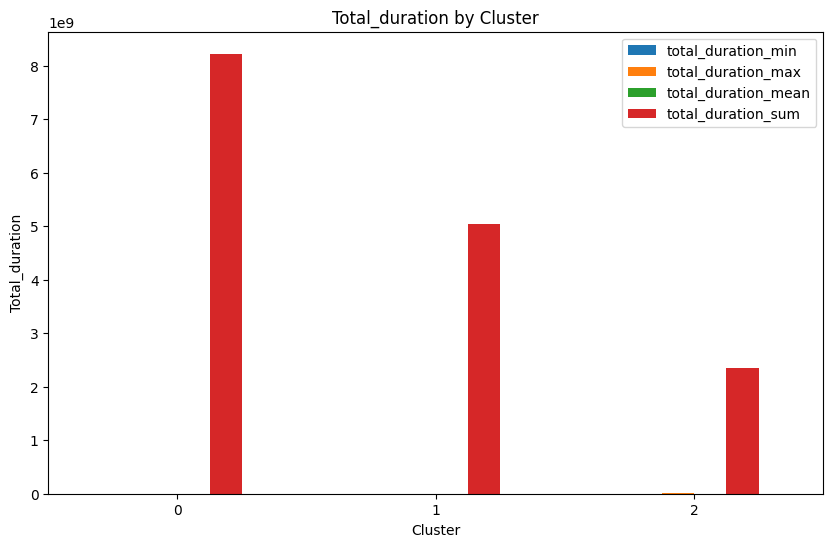

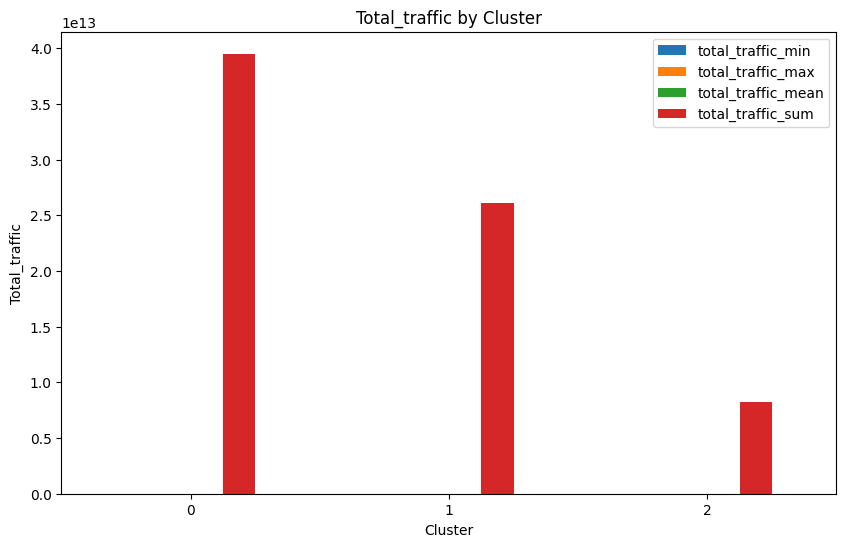

   cluster  session_frequency_min  session_frequency_max  \
0        0                      0                      2   
1        1                      1                      4   
2        2                      1                     18   

   session_frequency_mean  session_frequency_sum  total_duration_min  \
0                    1.02                  81596                7142   
1                    2.18                  51148               18235   
2                    4.39                  15762               66594   

   total_duration_max  total_duration_mean  total_duration_sum  \
0              877385            103062.37        8.225511e+09   
1             1480875            214945.04        5.042826e+09   
2            18553754            655831.75        2.350501e+09   

   total_traffic_min  total_traffic_max  total_traffic_mean  total_traffic_sum  
0           33249009       1.427100e+09        4.950482e+08       3.951029e+13  
1          118487293       2.512802e+09    

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual DataFrame)
data = {
    'cluster': [0, 1, 2],
    'session_frequency_min': [0, 1, 1],
    'session_frequency_max': [2, 4, 18],
    'session_frequency_mean': [1.02, 2.18, 4.39],
    'session_frequency_sum': [81596, 51148, 15762],
    'total_duration_min': [7142, 18235, 66594],
    'total_duration_max': [877385, 1480875, 18553754],
    'total_duration_mean': [103062.37, 214945.04, 655831.75],
    'total_duration_sum': [8.225511e+09, 5.042826e+09, 2.350501e+09],
    'total_traffic_min': [33249009, 118487293, 370420998],
    'total_traffic_max': [1.4271e+09, 2.512802e+09, 8.846226e+09],
    'total_traffic_mean': [4.950482e+08, 1.113773e+09, 2.285971e+09],
    'total_traffic_sum': [3.951029e+13, 2.613024e+13, 8.192919e+12],
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the metrics for each cluster
metrics = ['session_frequency', 'total_duration', 'total_traffic']
for metric in metrics:
    df[[f'{metric}_min', f'{metric}_max', f'{metric}_mean', f'{metric}_sum']].plot(
        kind='bar', figsize=(10, 6), title=f'{metric.capitalize()} by Cluster'
    )
    plt.xticks(range(len(df)), labels=df['cluster'], rotation=0)
    plt.xlabel('Cluster')
    plt.ylabel(metric.capitalize())
    plt.legend([f'{metric}_min', f'{metric}_max', f'{metric}_mean', f'{metric}_sum'])
    plt.show()

# Interpret metrics
print(df)


In [13]:
# Aggregate user total traffic per application
applications = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
application_traffic = df.groupby('MSISDN/Number')[applications].sum().reset_index()

# Derive the top 10 most engaged users per application
top_10_users_per_app = {}
for app in applications:
    top_10_users_per_app[app] = application_traffic.nlargest(10, app)

print("Top 10 most engaged users per application:")
for app, users in top_10_users_per_app.items():
    print(f"\nApplication: {app}")
    print(users)

Top 10 most engaged users per application:

Application: Social Media DL (Bytes)
        MSISDN/Number  Social Media DL (Bytes)  Google DL (Bytes)  \
13526    3.362632e+10               42743837.0        116106455.0   
92923    3.376054e+10               39297646.0         88626532.0   
37052    3.365973e+10               34900444.0         90958549.0   
6437     3.361489e+10               27749744.0         93941708.0   
13180    3.362578e+10               26564121.0        107904739.0   
65118    3.366716e+10               23753753.0         71707826.0   
106137   3.378632e+10               23568655.0         78819810.0   
70960    3.366907e+10               23477047.0         54915216.0   
666      3.360313e+10               22776679.0         73942055.0   
31331    3.365849e+10               22695673.0         55457602.0   

        Email DL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  \
13526         33404785.0         164048706.0         199479238.0   
92923         26437895.

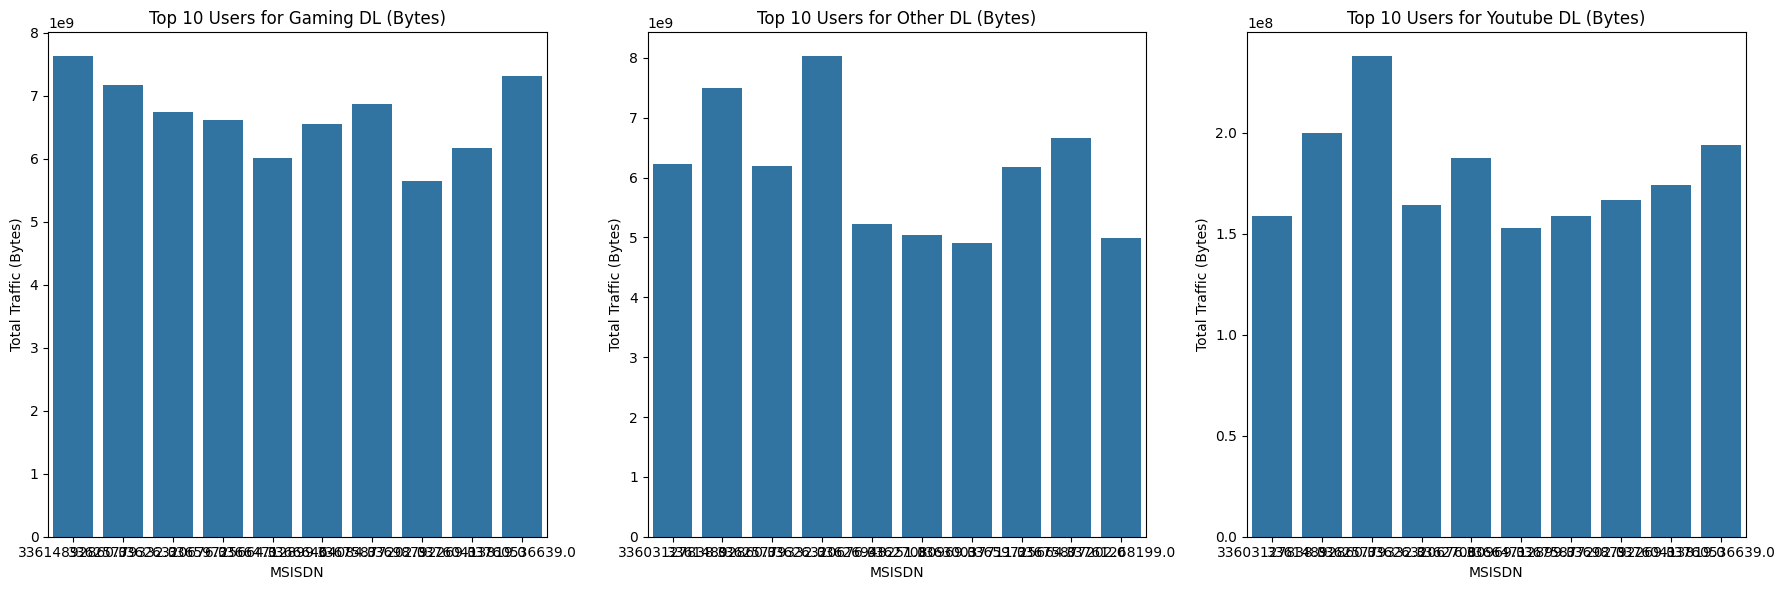

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 3 most used applications
total_traffic_per_app = application_traffic[applications].sum().sort_values(ascending=False)
top_3_apps = total_traffic_per_app.head(3).index

# Plot the top 3 most used applications
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, app in enumerate(top_3_apps):
    sns.barplot(x=application_traffic.nlargest(10, app)['MSISDN/Number'], y=application_traffic.nlargest(10, app)[app], ax=axes[i])
    axes[i].set_title(f'Top 10 Users for {app}')
    axes[i].set_xlabel('MSISDN')
    axes[i].set_ylabel('Total Traffic (Bytes)')
plt.tight_layout()
plt.show()

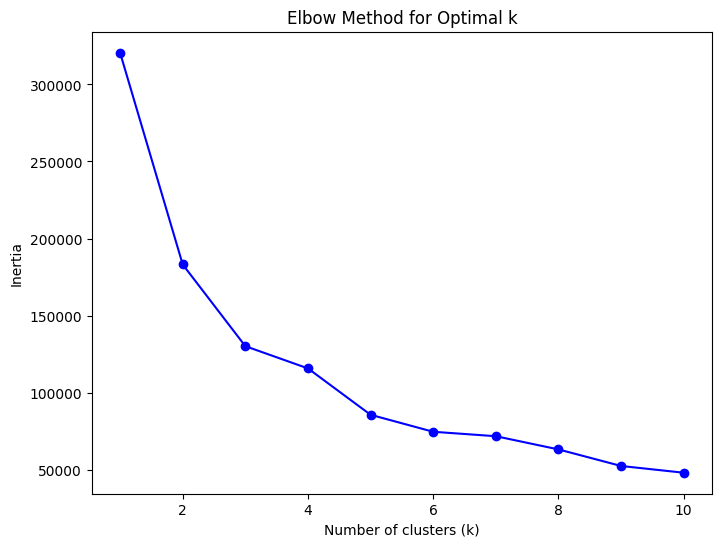

In [16]:
# Use the elbow method to find the optimal value of k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()